Saved CSV → C:\Users\anish\case-01-hbs_outputs\sales_by_segment.csv


,Month,Electronics,Clothing,HomeGoods,Total
0,Jan,45892,33678,23907,103477
1,Feb,55466,35623,24309,115398
2,Mar,56999,37223,24193,118415
3,Apr,57569,39384,27385,124338
4,May,60239,39838,27090,127167
5,Jun,67221,39730,27671,134622
6,Jul,62222,45107,28797,136126
7,Aug,71063,44978,28772,144813
8,Sep,68832,47046,29187,145065
9,Oct,70486,48216,32590,151292


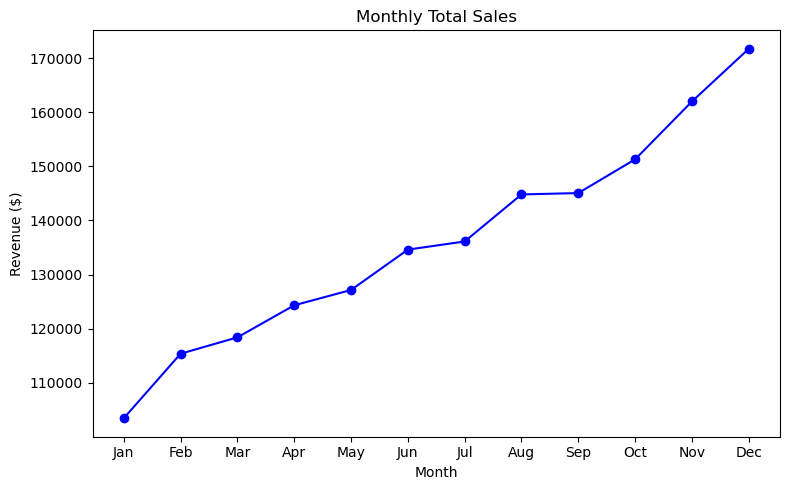

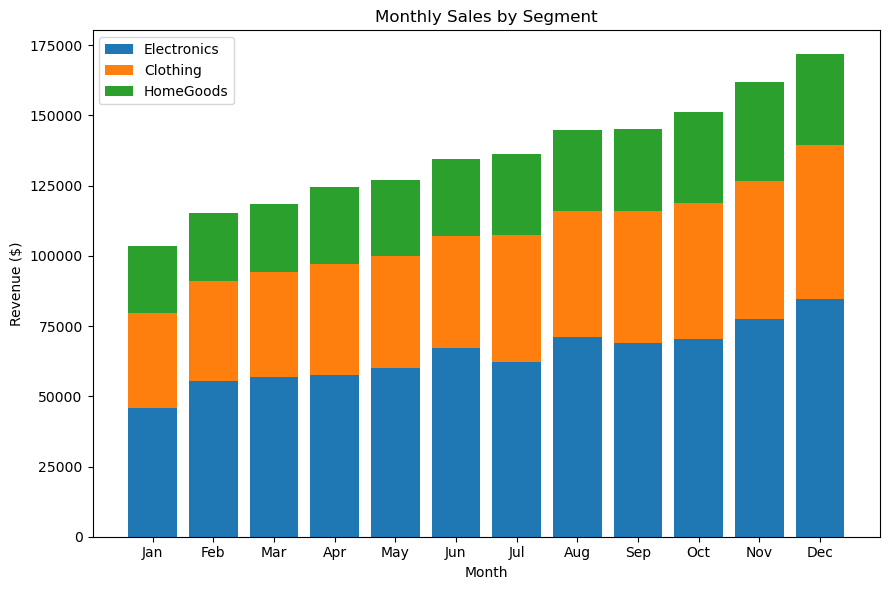

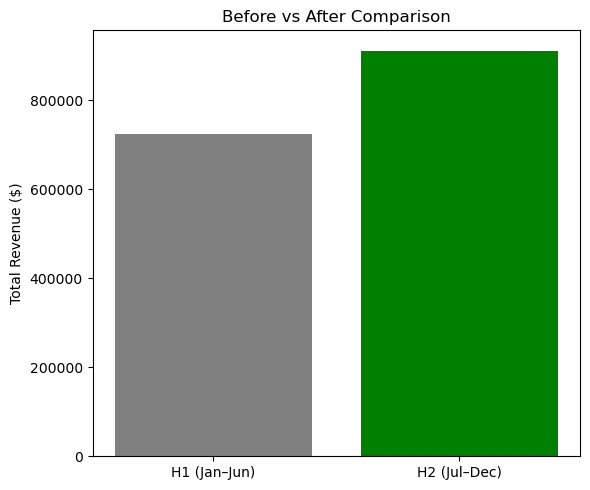

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Set up output folder locally ---
out_dir = Path("./case-01-hbs_outputs")
out_dir.mkdir(exist_ok=True)

# --- Define months ---
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# --- Generate random but realistic monthly sales ---
rng = np.random.default_rng(42)

# Electronics: ~45k–85k growing across the year
electronics = rng.integers(45000, 55000, size=12) + np.linspace(0, 30000, 12).astype(int)
# Clothing: ~30k–55k growing
clothing = rng.integers(30000, 35000, size=12) + np.linspace(0, 20000, 12).astype(int)
# HomeGoods: ~20k–40k steady growth
homegoods = rng.integers(20000, 25000, size=12) + np.linspace(0, 12000, 12).astype(int)

# Build DataFrame
df = pd.DataFrame({
    "Month": months,
    "Electronics": electronics,
    "Clothing": clothing,
    "HomeGoods": homegoods
})
df["Total"] = df[["Electronics","Clothing","HomeGoods"]].sum(axis=1)

# Save CSV
csv_path = out_dir / "sales_by_segment.csv"
df.to_csv(csv_path, index=False)
print("Saved CSV →", csv_path.resolve())
display(df)

# --- Chart 1: Total sales trend ---
plt.figure(figsize=(8,5))
plt.plot(df["Month"], df["Total"], marker="o", color="blue")
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig(out_dir / "chart_total_trend.png", dpi=150)
plt.show()

# --- Chart 2: Stacked bar by segment ---
plt.figure(figsize=(9,6))
bottom = np.zeros(len(df))
for col in ["Electronics","Clothing","HomeGoods"]:
    plt.bar(df["Month"], df[col], bottom=bottom, label=col)
    bottom += df[col].values
plt.title("Monthly Sales by Segment")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.legend()
plt.tight_layout()
plt.savefig(out_dir / "chart_segment_stacked.png", dpi=150)
plt.show()

# --- Chart 3: Before vs After (H1 vs H2) ---
h1_total = df.loc[:5,"Total"].sum()  # Jan–Jun
h2_total = df.loc[6:,"Total"].sum()  # Jul–Dec

plt.figure(figsize=(6,5))
plt.bar(["H1 (Jan–Jun)","H2 (Jul–Dec)"], [h1_total, h2_total], color=["gray","green"])
plt.title("Before vs After Comparison")
plt.ylabel("Total Revenue ($)")
plt.tight_layout()
plt.savefig(out_dir / "chart_before_after.png", dpi=150)
plt.show()
